In [ ]:

import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

IMAGE_SIZE = (240, 240)
BATCH_SIZE = 32

test_dir = "/content/drive/MyDrive/Lung Disease Dataset/test"

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())

Found 2025 images belonging to 5 classes.


In [ ]:
#loading all saved models
resnet_preds = np.load('/content/drive/MyDrive/resnet50_preds.npy')
vit_preds = np.load('/content/drive/MyDrive/vit_preds.npy')
densenet_preds = np.load('/content/drive/MyDrive/densenet121_preds.npy')
efficientnet_preds = np.load('/content/drive/MyDrive/efficientnetb3_preds.npy')

In [ ]:
#  Converting to Labels
resnet_labels = np.argmax(resnet_preds, axis=1)
vit_labels = np.argmax(vit_preds, axis=1)
densenet_labels = np.argmax(densenet_preds, axis=1)
efficientnet_labels = np.argmax(efficientnet_preds, axis=1)

In [ ]:
#  Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
# Evaluation of each model
evaluate_model("ResNet", true_labels, resnet_labels)
evaluate_model("ViT", true_labels, vit_labels)
evaluate_model("DenseNet", true_labels, densenet_labels)
evaluate_model("EfficientNetB3", true_labels, efficientnet_labels)


Model: ResNet
Accuracy: 91.16%
Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.89      0.74      0.81       403
Corona Virus Disease       0.99      0.99      0.99       407
              Normal       0.92      0.99      0.95       404
        Tuberculosis       1.00      0.99      1.00       408
     Viral Pneumonia       0.77      0.84      0.81       403

            accuracy                           0.91      2025
           macro avg       0.91      0.91      0.91      2025
        weighted avg       0.91      0.91      0.91      2025


Model: ViT
Accuracy: 86.12%
Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.73      0.75      0.74       403
Corona Virus Disease       0.97      0.95      0.96       407
              Normal       0.94      0.92      0.93       404
        Tuberculosis       0.96      0.99      0.98       408
     Viral Pneumonia 

<ipython-input-9-e72383405d7e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=model_names, y=accuracy_percent, palette="Blues_d")


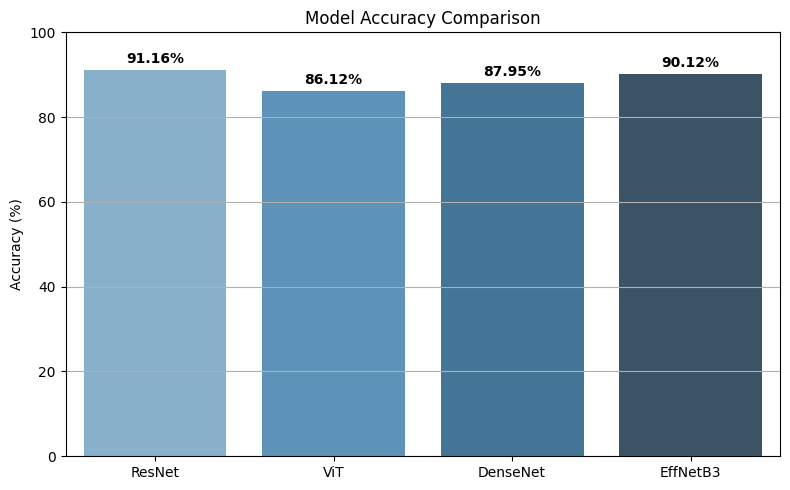

In [ ]:
# bar plot for model comparision
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# true_labels, resnet_labels, vit_labels, densenet_labels, efficientnet_labels

accuracies = [
    accuracy_score(true_labels, resnet_labels),
    accuracy_score(true_labels, vit_labels),
    accuracy_score(true_labels, densenet_labels),
    accuracy_score(true_labels, efficientnet_labels)
]

model_names = ['ResNet', 'ViT', 'DenseNet', 'EffNetB3']
accuracy_percent = [acc * 100 for acc in accuracies]

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=model_names, y=accuracy_percent, palette="Blues_d")

# Add accuracy values on top of each bar
for index, value in enumerate(accuracy_percent):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


** Ensembling the Models**

In [ ]:
# Loading all .npy prediction files
resnet_preds = np.load('/content/drive/MyDrive/resnet50_preds.npy')
vit_preds = np.load('/content/drive/MyDrive/vit_preds.npy')
densenet_preds = np.load('/content/drive/MyDrive/densenet121_preds.npy')
efficientnet_preds = np.load('/content/drive/MyDrive/efficientnetb3_preds.npy')


In [ ]:

# Loading true labels from test directory
IMAGE_SIZE = (240, 240)
BATCH_SIZE = 32
test_dir = "/content/drive/MyDrive/Lung Disease Dataset/test"

datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

Found 2025 images belonging to 5 classes.


In [ ]:
#Weighted Soft Voting
ensemble_probs = (
    0.2 * resnet_preds +
    0.25 * vit_preds +
    0.25 * densenet_preds +
    0.3 * efficientnet_preds
)

ensemble_labels = np.argmax(ensemble_probs, axis=1)

In [ ]:

#  Evaluaing Ensemble
print(" Ensemble Accuracy:", accuracy_score(y_true, ensemble_labels) * 100, "%")
print("\n Classification Report:")
print(classification_report(y_true, ensemble_labels, target_names=class_names))

 Ensemble Accuracy: 92.49382716049382 %

 Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.86      0.83      0.85       403
Corona Virus Disease       1.00      0.99      1.00       407
              Normal       0.93      0.99      0.96       404
        Tuberculosis       1.00      1.00      1.00       408
     Viral Pneumonia       0.83      0.81      0.82       403

            accuracy                           0.92      2025
           macro avg       0.92      0.92      0.92      2025
        weighted avg       0.92      0.92      0.92      2025



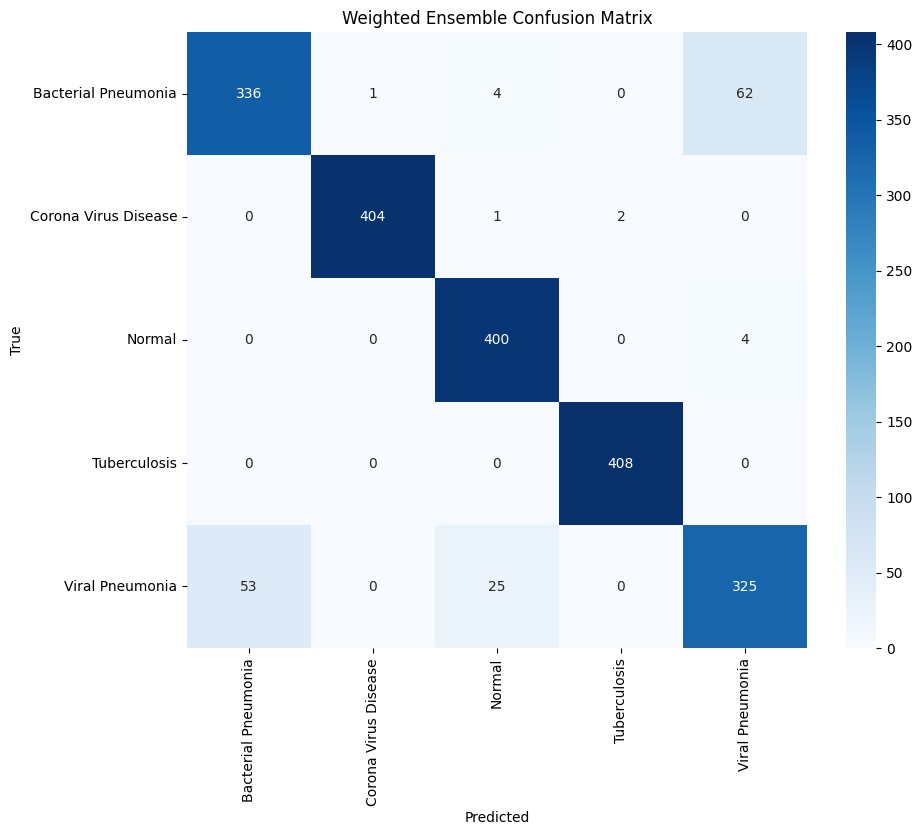

In [ ]:
# ===  Confusion Matrix ===
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, ensemble_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Weighted Ensemble Confusion Matrix')
plt.show()

In [ ]:
def print_per_class_accuracy(conf_matrix, class_names):
    print("\nPer-Class Accuracy:")
    for i, name in enumerate(class_names):
        correct = conf_matrix[i, i]
        total = conf_matrix[i].sum()
        acc = 100 * correct / total
        print(f"{name}: {acc:.2f}%")

print_per_class_accuracy(conf_matrix, class_names)



Per-Class Accuracy:
Bacterial Pneumonia: 83.37%
Corona Virus Disease: 99.26%
Normal: 99.01%
Tuberculosis: 100.00%
Viral Pneumonia: 80.65%


In [ ]:
np.save('/content/drive/MyDrive/ensemble_preds.npy', ensemble_probs)


** Plotting ROC Curve for Ensemble Model**

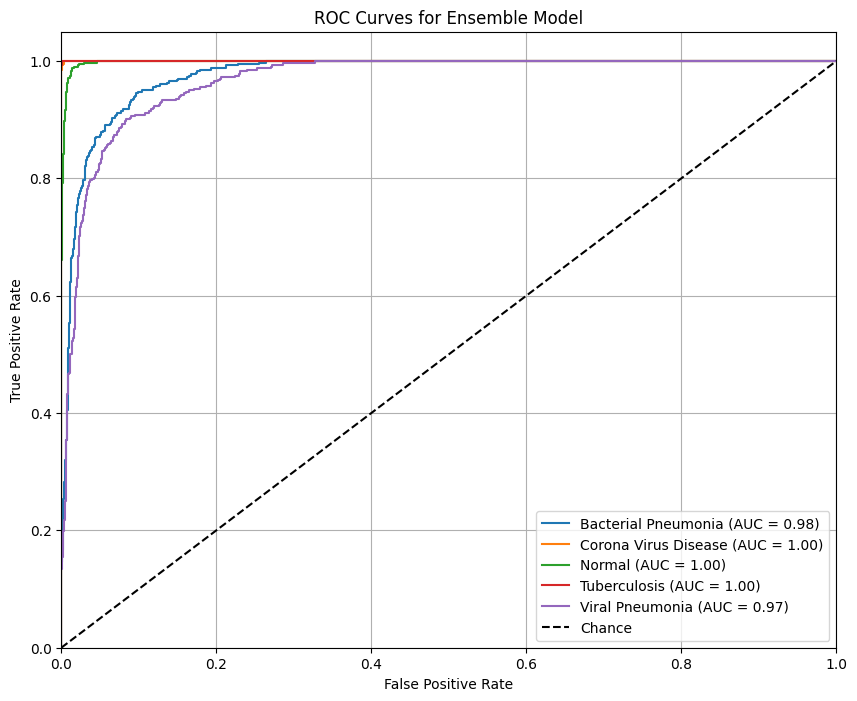

In [ ]:
# Binarize the labels for multi-class ROC (one-hot encoding)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], ensemble_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Ensemble Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

** Grad-CAM for resnet50**


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 240, 240, 3))
  warnings.warn(msg)


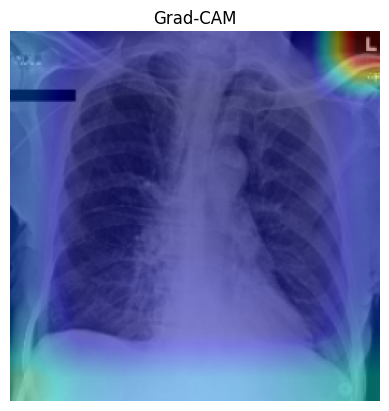

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Loading the model
model = tf.keras.models.load_model('/content/drive/MyDrive/efficientnetb3_lung_model.h5')

# Define image size and path to test images
IMG_SIZE = (240, 240)
test_dir = '/content/drive/MyDrive/Lung Disease Dataset/test'
class_indices = list(os.listdir(test_dir))

#  sample image from one class for visualization
sample_class = class_indices[0]  # e.g., 'Normal'
sample_image_path = os.path.join(test_dir, sample_class, os.listdir(os.path.join(test_dir, sample_class))[0])

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Create Grad-CAM heatmap function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Identify the last convolutional layer
last_conv_layer_name = 'top_activation'  # or check your model.summary()

# Generate heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display image with heatmap overlay
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMG_SIZE)
    heatmap = cv2.resize(heatmap, IMG_SIZE)
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.axis('off')
    plt.show()

# Show result
display_gradcam(sample_image_path, heatmap)


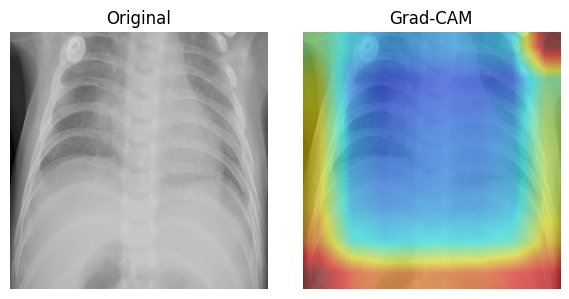

✅ Grad-CAM shown for: Bacterial Pneumonia


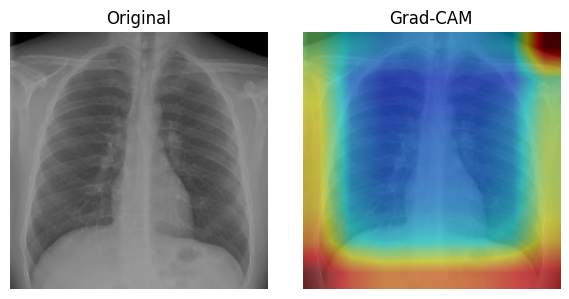

✅ Grad-CAM shown for: Corona Virus Disease


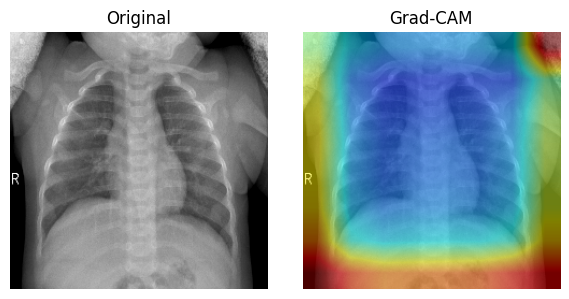

✅ Grad-CAM shown for: Normal


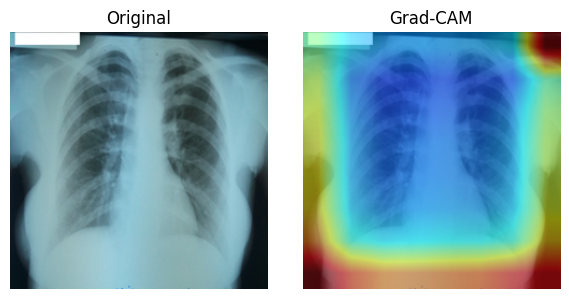

✅ Grad-CAM shown for: Tuberculosis


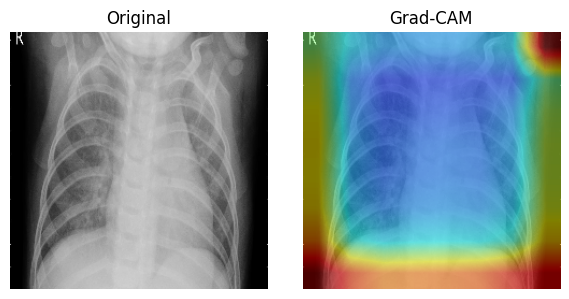

✅ Grad-CAM shown for: Viral Pneumonia


In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.models import load_model

# Grad-CAM function
def generate_gradcam(img_array, model, last_conv_layer_name='top_conv'):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        output = predictions[:, class_idx]

    grads = tape.gradient(output, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]

    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Side-by-side display function
def display_gradcam_pair(img_path, heatmap, alpha=0.5):
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (240, 240))
    img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Resize heatmap and apply colormap
    heatmap = cv2.resize(heatmap, (240, 240))
    heatmap = np.uint8(255 * heatmap)
    cam = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(original_img, 1 - alpha, cam, alpha, 0)
    superimposed = cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB)

    # Plot side-by-side
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed)
    plt.title("Grad-CAM")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Class-wise Grad-CAM generation
base_path = test_generator.directory  # assumes test_generator is already defined
class_names = test_generator.class_indices.keys()  # auto-detects classes

for class_name in class_names:
    class_path = os.path.join(base_path, class_name)
    image_files = os.listdir(class_path)
    sample_image_path = os.path.join(class_path, random.choice(image_files))

    # Prepare image for model
    img = image.load_img(sample_image_path, target_size=(240, 240))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Generate Grad-CAM heatmap
    heatmap = generate_gradcam(img_array, model, last_conv_layer_name='top_conv')

    # Display side-by-side result
    display_gradcam_pair(sample_image_path, heatmap)
    print(f"✅ Grad-CAM shown for: {class_name}")


In [ ]:
np.save('/content/drive/MyDrive/ensemble_preds.npy', ensemble_probs)
